In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('C:/Users/Sarthak/Downloads/TRAIN.csv')
test_df = pd.read_csv('C:/Users/Sarthak/Downloads/TEST_FINAL.csv')
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
print(train_df.shape , test_df.shape)

(188340, 10) (22265, 8)


"#order" feature is missing in test_df. We will need to access correlation of #order feature with sales

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
train_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


### Lets explore ###

C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew =  1.248819154338717


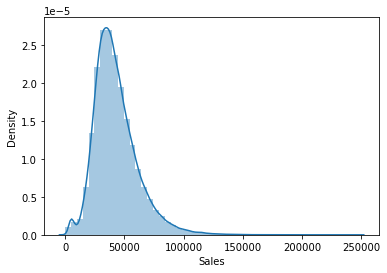

In [7]:
sns.distplot(train_df['Sales'])
#skewness
print("Skew = ",train_df['Sales'].skew())

It is evident that the target variable 'Sales' has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed.

In [8]:
# removing prefix from Store_Type,	Location_Type,	Region_Code	and converting to int
new_Store_Type = []
new_Location_Type = []
new_Region_Code = []
for i in train_df.Store_Type:
    new_Store_Type.append(int(i[1:]))
for j in train_df.Location_Type:
    new_Location_Type.append(int(j[1:]))
for k in train_df.Region_Code:
    new_Region_Code.append(int(k[1:]))
    
train_df['new_Store_Type'] = new_Store_Type
train_df['new_Location_Type'] = new_Location_Type
train_df['new_Region_Code'] = new_Region_Code

In [9]:
# removing prefix from Store_Type,	Location_Type,	Region_Code	and converting to int
new_Store_Type = []
new_Location_Type = []
new_Region_Code = []
for i in test_df.Store_Type:
    new_Store_Type.append(int(i[1:]))
for j in test_df.Location_Type:
    new_Location_Type.append(int(j[1:]))
for k in test_df.Region_Code:
    new_Region_Code.append(int(k[1:]))
    
test_df['new_Store_Type'] = new_Store_Type
test_df['new_Location_Type'] = new_Location_Type
test_df['new_Region_Code'] = new_Region_Code

Since there is no time data given, I will break the date column into 3 columns: day, month and year

In [10]:
year = []
month = []
day = []

for i in train_df.Date:
    year.append(int(i[0:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:]))

train_df['year'] = year
train_df['month'] = month
train_df['day'] = day

In [11]:
year = []
month = []
day = []

for i in test_df.Date:
    year.append(int(i[0:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:]))

test_df['year'] = year
test_df['month'] = month
test_df['day'] = day

In [12]:
# lets check the correlations
train_df.corr()

,Store_id,Holiday,#Order,Sales,new_Store_Type,new_Location_Type,new_Region_Code,year,month,day
Store_id,1.000000e+00,5.380970e-16,0.028290,0.004377,8.627203e-02,6.729649e-02,-1.252935e-01,4.924216e-15,-2.816837e-16,-4.550589e-17
Holiday,5.380970e-16,1.000000e+00,-0.140496,-0.154779,7.021551e-16,6.219958e-16,1.221878e-15,1.386181e-02,1.370518e-02,1.366827e-02
#Order,2.828985e-02,-1.404963e-01,1.000000,0.941601,5.838000e-01,-2.485666e-01,-2.356142e-01,2.285999e-02,-2.863725e-03,-1.795101e-02
Sales,4.376631e-03,-1.547788e-01,0.941601,1.000000,4.924707e-01,-2.837714e-01,-1.210026e-01,1.828431e-02,-1.809195e-02,-3.896935e-02
new_Store_Type,8.627203e-02,7.021551e-16,0.583800,0.492471,1.000000e+00,-1.009121e-01,-2.438844e-01,1.093268e-14,5.232364e-15,8.270544e-16
new_Location_Type,6.729649e-02,6.219958e-16,-0.248567,-0.283771,-1.009121e-01,1.000000e+00,-7.198033e-02,-4.650599e-15,7.869645e-15,-6.244640e-17
new_Region_Code,-1.252935e-01,1.221878e-15,-0.235614,-0.121003,-2.438844e-01,-7.198033e-02,1.000000e+00,-5.028192e-15,1.014792e-14,-6.102796e-16
year,4.924216e-15,1.386181e-02,0.022860,0.018284,1.093268e-14,-4.650599e-15,-5.028192e-15,1.000000e+00,-4.701419e-01,-5.078096e-03
month,-2.816837e-16,1.370518e-02,-0.002864,-0.018092,5.232364e-15,7.869645e-15,1.014792e-14,-4.701419e-01,1.000000e+00,1.273428e-02
day,-4.550589e-17,1.366827e-02,-0.017951,-0.038969,8.270544e-16,-6.244640e-17,-6.102796e-16,-5.078096e-03,1.273428e-02,1.000000e+00


<AxesSubplot:>

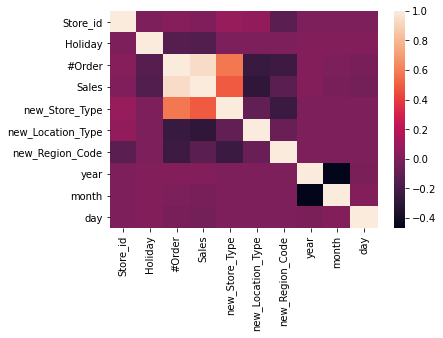

In [13]:
sns.heatmap(train_df.corr())

Discovered that the order and Sales have a high correlation. Need to investigate order further.

In [14]:
train_df['#Order'].nunique()

299

In [15]:
print(train_df.Store_id.nunique(), test_df.Store_id.nunique())

365 365


We will calculate 'orders' for test_df with the help of 'Store_id' on *Feature engineering* section

Text(0, 0.5, 'Sales')

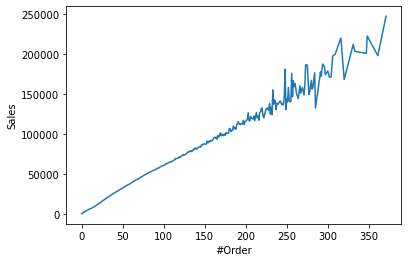

In [16]:
sales_per_order = train_df['Sales'].groupby(train_df['#Order']).mean().plot()
plt.ylabel('Sales')

year
2018    42567.271022
2019    43309.002088
Name: Sales, dtype: float64


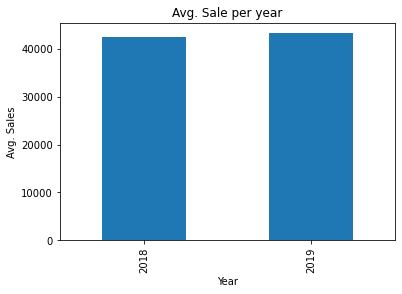

In [17]:
#Avg. Sale per year
sales_per_yr = train_df['Sales'].groupby(train_df.year).mean()
sales_per_yr.plot(kind = "bar")
plt.xlabel('Year')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sale per year')
print(sales_per_yr)

2019 had more sales than 2018, lets find out why?

Text(0.5, 1.0, 'Avg. Sale per Store_Type')

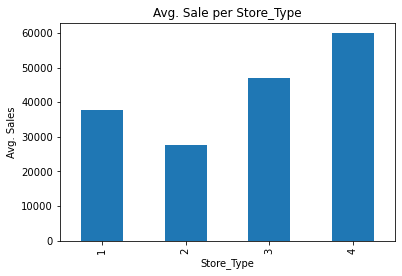

In [18]:
sales_per_storetype = train_df['Sales'].groupby(train_df['new_Store_Type']).mean()
sales_per_storetype.plot(kind = 'bar')
plt.xlabel('Store_Type')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sale per Store_Type')

Text(0.5, 1.0, 'Avg. Sale per Store_Type')

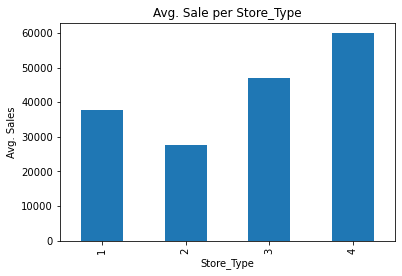

In [19]:
sales_per_storetype = train_df['Sales'].groupby(train_df['new_Store_Type']).mean()
sales_per_storetype.plot(kind = 'bar')
plt.xlabel('Store_Type')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sale per Store_Type')

Store_Type 4 has the highest avg sale record in both years

<AxesSubplot:xlabel='new_Location_Type'>

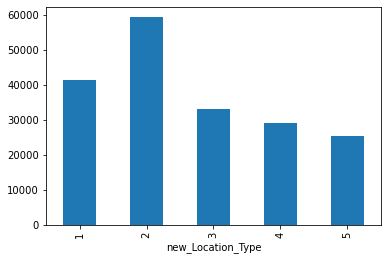

In [20]:
train_df['Sales'].groupby(train_df['new_Location_Type']).mean().plot(kind = 'bar')

<AxesSubplot:xlabel='new_Region_Code'>

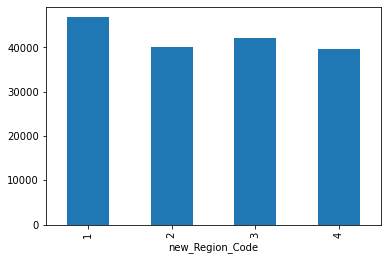

In [21]:
train_df['Sales'].groupby(train_df['new_Region_Code']).mean().plot(kind = 'bar')

Apparently location is a better contributor to sales than region also we can infer from the scales of the two graphs that region code is a subset of location code. Therefore, exploring store types based on location

new_Location_Type
1    65.265938
2    94.851456
3    53.156943
4    47.386028
5    41.924131
Name: #Order, dtype: float64


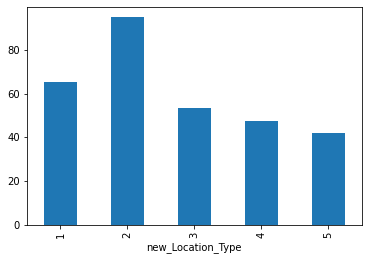

In [22]:
train_df['#Order'].groupby(train_df['new_Location_Type']).mean().plot(kind = 'bar')
print(train_df['#Order'].groupby(train_df['new_Location_Type']).mean())

### Feature Engineering ###

##### Calculating order for test_df #####

To calculate order for test data I am imputing them with the mean() orders according to store id

In [23]:
order = train_df.groupby(['Store_id']).mean()['#Order']

In [24]:
m=pd.DataFrame(order)
li =[]
for r in range(1, 366):
    li.append(r)
m['Store_id'] = li
m

,#Order,Store_id
Store_id,,
1,59.124031,1
2,76.197674,2
3,115.284884,3
4,64.877907,4
5,68.304264,5
...,...,...
361,55.647287,361
362,56.926357,362
363,67.631783,363


In [25]:
keys = li
values = order
d = dict(zip(keys,values))

In [26]:
test_df["#Order"] = test_df['Store_id'].map(d)
test_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,new_Store_Type,new_Location_Type,new_Region_Code,year,month,day,#Order
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,4,2,3,2019,6,1,90.912791
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,1,1,1,2019,6,1,64.279070
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,4,2,1,2019,6,1,115.833333
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,1,1,4,2019,6,1,53.852713
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,1,2,2019,6,1,57.325581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,2,5,2,2019,7,31,33.761628
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,4,2,1,2019,7,31,110.724806
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,1,1,3,2019,7,31,58.162791
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,1,1,4,2019,7,31,53.228682


##### Store rating
Since store id is having a positive impact on sales so it is crucial to find a rating scheme for each and every store. Often, good stores makes more sales than other mediocre ones. Lets find the those stores.

In [27]:
mean_order = train_df.groupby(['new_Store_Type', 'new_Location_Type']).mean()['#Order']
mean_order

new_Store_Type  new_Location_Type
1               1                     58.398077
                2                     65.204873
                3                     56.496124
                4                     53.067668
                5                     54.465393
2               1                     44.255599
                3                     42.177110
                4                     39.810508
                5                     37.534690
3               1                     73.012299
                2                     74.859388
                3                     72.513566
4               1                     91.009546
                2                    107.349994
Name: #Order, dtype: float64

In [28]:
mean_or = []
for j,k in zip(train_df['new_Store_Type'], train_df['new_Location_Type']):
    if(j == 1 and k == 1):
        mean_or.append(58.398077)
    if(j == 1 and k == 2):
        mean_or.append(65.204873)
    if(j == 1 and k == 3):
        mean_or.append(56.496124)
    if(j == 1 and k == 4):
        mean_or.append(53.067668)
    if(j == 1 and k == 5):
        mean_or.append(54.465393)
    if(j == 2 and k == 1):
        mean_or.append(44.255599)
    if(j == 2 and k == 3):
        mean_or.append(42.177110)  
    if(j == 2 and k == 4):
        mean_or.append(39.810508)  
    if(j == 2 and k == 5):
        mean_or.append(37.534690)  
    if(j == 3 and k == 1):
        mean_or.append(73.012299)  
    if(j == 3 and k == 2):
        mean_or.append(74.859388)  
    if(j == 3 and k == 3):
        mean_or.append(72.513566)  
    if(j == 4 and k == 1):
        mean_or.append(91.009546)  
    if(j == 4 and k == 2):
        mean_or.append(107.349994)  

In [29]:
train_df['mean_or'] = mean_or

In [30]:
# Rating the stores such that if orders are less than mean_order then its underperforming, 
#if orders are greater than mean_order then its mediocre, if orders are much grater then mean_order then its over_performing
def store_ratings(row):
    store_ratings = []
    if (row['#Order'] <= row['mean_or']):
        return 1
    if (row['#Order'] > row['mean_or']):
        return 2
    if (row['#Order'] > row['mean_or']+5):
        return 3

train_df.loc[:, 'store_rating'] = train_df.apply(store_ratings, axis = 1)

In [31]:
train_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,new_Store_Type,new_Location_Type,new_Region_Code,year,month,day,mean_or,store_rating
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,3,1,2018,1,1,56.496124,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,4,2,1,2018,1,1,107.349994,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,3,2,1,2018,1,1,74.859388,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2,3,1,2018,1,1,42.177110,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2,3,4,2018,1,1,42.177110,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2,3,2,2019,5,31,42.177110,2
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,4,2,1,2019,5,31,107.349994,1
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,1,3,2,2019,5,31,56.496124,1
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,3,1,2,2019,5,31,73.012299,1


In [32]:
#calculating the same for test data
mean_order_test = test_df.groupby(['new_Store_Type', 'new_Location_Type']).mean()['#Order']
mean_order_test

new_Store_Type  new_Location_Type
1               1                     58.398077
                2                     65.204873
                3                     56.496124
                4                     53.067668
                5                     54.465393
2               1                     44.255599
                3                     42.177110
                4                     39.810508
                5                     37.534690
3               1                     73.012299
                2                     74.859388
                3                     72.513566
4               1                     91.009546
                2                    107.349994
Name: #Order, dtype: float64

In [33]:
mean_or = []
for j,k in zip(test_df['new_Store_Type'], test_df['new_Location_Type']):
    if(j == 1 and k == 1):
        mean_or.append(58.398077)
    if(j == 1 and k == 2):
        mean_or.append(65.204873)
    if(j == 1 and k == 3):
        mean_or.append(56.496124)
    if(j == 1 and k == 4):
        mean_or.append(53.067668)
    if(j == 1 and k == 5):
        mean_or.append(54.465393)
    if(j == 2 and k == 1):
        mean_or.append(44.255599)
    if(j == 2 and k == 3):
        mean_or.append(42.177110)  
    if(j == 2 and k == 4):
        mean_or.append(39.810508)  
    if(j == 2 and k == 5):
        mean_or.append(37.534690)  
    if(j == 3 and k == 1):
        mean_or.append(73.012299)  
    if(j == 3 and k == 2):
        mean_or.append(74.859388)  
    if(j == 3 and k == 3):
        mean_or.append(72.513566)  
    if(j == 4 and k == 1):
        mean_or.append(91.009546)  
    if(j == 4 and k == 2):
        mean_or.append(107.349994)  
        
test_df['mean_or'] = mean_or

In [34]:
test_df.loc[:, 'store_rating'] = test_df.apply(store_ratings, axis = 1)
test_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,new_Store_Type,new_Location_Type,new_Region_Code,year,month,day,#Order,mean_or,store_rating
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,4,2,3,2019,6,1,90.912791,107.349994,1
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,1,1,1,2019,6,1,64.279070,58.398077,2
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,4,2,1,2019,6,1,115.833333,107.349994,2
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,1,1,4,2019,6,1,53.852713,58.398077,1
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,1,2,2019,6,1,57.325581,58.398077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,2,5,2,2019,7,31,33.761628,37.534690,1
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,4,2,1,2019,7,31,110.724806,107.349994,2
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,1,1,3,2019,7,31,58.162791,58.398077,1
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,1,1,4,2019,7,31,53.228682,58.398077,1


### Data Preprocessing

In [35]:
copy_train_df = train_df.copy()
copy_test_df = test_df.copy()

In [36]:
#removing redundant columns
train_df =  train_df.drop(columns= ['ID', 'Store_id','Store_Type', 'Location_Type', 'Region_Code', 'Date', 'mean_or'],  axis=1)
test_df =  test_df.drop(columns= ['ID', 'Store_id','Store_Type', 'Location_Type', 'Region_Code', 'Date', 'mean_or'],  axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Holiday            188340 non-null  int64  
 1   Discount           188340 non-null  object 
 2   #Order             188340 non-null  int64  
 3   Sales              188340 non-null  float64
 4   new_Store_Type     188340 non-null  int64  
 5   new_Location_Type  188340 non-null  int64  
 6   new_Region_Code    188340 non-null  int64  
 7   year               188340 non-null  int64  
 8   month              188340 non-null  int64  
 9   day                188340 non-null  int64  
 10  store_rating       188340 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 15.8+ MB


In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday            22265 non-null  int64  
 1   Discount           22265 non-null  object 
 2   new_Store_Type     22265 non-null  int64  
 3   new_Location_Type  22265 non-null  int64  
 4   new_Region_Code    22265 non-null  int64  
 5   year               22265 non-null  int64  
 6   month              22265 non-null  int64  
 7   day                22265 non-null  int64  
 8   #Order             22265 non-null  float64
 9   store_rating       22265 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.7+ MB


In [38]:
#Train_test_split()
X = train_df.loc[:, train_df.columns != 'Sales'].values
y = train_df.iloc[:, 3:4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#X_train = train_df.drop(columns = ['Sales']).values
#Y_train = train_df['Sales'].values
test = test_df.values

In [39]:
test

array([[0, 'No', 4, ..., 1, 90.91279069767442, 1],
       [0, 'No', 1, ..., 1, 64.27906976744185, 2],
       [0, 'No', 4, ..., 1, 115.83333333333333, 2],
       ...,
       [0, 'Yes', 1, ..., 31, 58.16279069767442, 1],
       [0, 'No', 1, ..., 31, 53.22868217054263, 1],
       [0, 'No', 2, ..., 31, 44.51550387596899, 2]], dtype=object)

In [40]:
# encoding 'discount' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1:2])
X_test[:, 1] = le.fit_transform(X_test[:, 1:2])
test[:, 1] = le.fit_transform(test[:, 1:2])

C:\Users\Sarthak\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Model Creation

##### Random Forest

In [41]:
# Training the Random Forest regression model on the Training set
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, criterion = 'mse', random_state = 0)
rf_regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_regressor.predict(X_test)

<ipython-input-41-2451e489e137>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred))

0.9600333386053884 13415506.859821288 2549.088564033147


##### XGBoost

In [44]:
import xgboost as xgb

In [45]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [46]:
param = {
    'max_depth': 7,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'subsample': 0.7,  # logging mode - quiet
    'colsample_bytree': 0.8}  # the number of classes that exist in this datset
num_round = 10  # the number of training iterations

In [47]:
model = xgb.train(param, dtrain, num_round)

In [48]:
preds = model.predict(dtest)

In [49]:
print(r2_score(y_test, preds), mean_squared_error(y_test, preds), mean_absolute_error(y_test, preds))

0.9502132703140483 16711784.030076709 2809.5454145299886


##### ElasticNet

In [50]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

# Predicting the Test set results
y_predict = elasticnet_model.predict(X_test)

In [51]:
print(r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict), mean_absolute_error(y_test, y_predict))

0.906637776326717 31338658.48264132 4117.071439528521


##### Saving the model

In [62]:
import pickle
# Save the Modle to file in the current working directory
Pkl_Filename = "sales_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

##### Submission

In [52]:
#Therefore generating the output
final_predict = model.predict(xgb.DMatrix(test))

In [53]:
final_predict

array([3223.8862, 2331.9673, 3763.5315, ..., 1927.7438, 1900.3625,
       3468.8062], dtype=float32)

In [58]:
df = pd.DataFrame(final_predict, columns = ['Sales'])
df['Id'] = copy_test_df.ID

In [60]:
filename = 'submission.csv'
pd.DataFrame({'Id': df.Id, 'Sales': df.Sales}).to_csv(filename, index=False)